# Generative Adversarial Network

**Task Overview:**
- Implement the GAN task with Keras and TensorFlow

**Runtime Type: GPU**

## 1 - Implement Generative Adversarial Network with Keras##
### 1.1 Prepare the data


**Tasks:**
1. Load the MNIST dataset and **print out the shape** of it
2. **Normalize the data** therefore every pixel value should be between 0 and 1
3. **Define a load_real_batch function** which generates a random batch of real images and labels for the training. 




In [ ]:
# 1. loading the mnist dataset and normalize it
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
import matplotlib.pyplot as plt


### Set random seed to ensure deterministic results
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import numpy as np
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)
reset_random_seeds()

#### 1.Load MNIST data; 
#### 2. Reshape them by expanding to 3d; 
#### 3. Define the type to float32
#### 4. Scale them to [0,1]; 

from keras.datasets.mnist import load_data
### load the images into memory

(trainX, trainy), (testX, testy) = load_data() 

def load_real_samples():
	### load mnist dataset
  (trainX,train), (test, test) = load_data() # only load trainX for real samples and other parameters are set to dummy variable
	### expand trainX to 3d, e.g. add channels dimension
  trainX = expand_dims(trainX, axis=-1) 
	### convert X from unsigned ints to float32
  trainX = trainX.astype("float32")
	### scale X from [0,255] to [0,1]
  trainX = trainX / 255
  return trainX


dataset = load_real_samples() # load real samples
print('dataset', dataset.shape) # print out the shape of dataset

dataset (60000, 28, 28, 1)


In [ ]:
### 2. define load_real_batch()

def generate_real_samples(dataset, n_samples):
  ix = randint(0, dataset.shape[0], n_samples)	# choose random instances with randit(start=0, end=num of data, sample=n_samples)
  X = dataset[ix] # retrieve selected images from indices of ix
  y = ones((n_samples, 1)) # generate 'real' class labels (1), i.e., real image is labeled by 1. 
  return X, y

sampleX,sampleY = generate_real_samples(dataset, 10) ### test the function with defined MNIST data and 10 samples
print(sampleX.shape) ### print shape X
print(sampleY.shape) ### print shape Y

(10, 28, 28, 1)
(10, 1)


### 1.2 - Build the Generative Adversarial Network (GAN) Model ##


Build the Generative Adversarial Network (GAN) with generator and discriminator. 

**The input shape of the generator should be: 100**

In [ ]:
### define the generator model ###

def define_generator(latent_dim):
  model = Sequential()
### foundation for 7x7 image
  n_nodes = 128 * 7 * 7 # num of nodes is 128 * 7 * 7
  model.add(Dense(n_nodes, input_dim=latent_dim)) 
  model.add(LeakyReLU(alpha=0.2)) 
  model.add(Reshape((7, 7, 128)))  
### upsample to 14x14
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
### upsample to 28x28
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) 
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same')) 
  return model

In [ ]:
### define the discriminator model ###

def define_discriminator(in_shape=(28,28,1)):
  model = Sequential()
  model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2)) 
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2)) 
  model.add(Dropout(0.4)) 
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid')) 
### compile model ###
  opt = Adam(lr=0.0002, beta_1=0.5) 
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

### 1.3 Compile and train the GAN model

Compile and train the GAN Model. 

**Tasks:**
1. Compile the GAN Model with **binary_crossentropy** and **Adam optimizer** of **learning rate = 0.0002** and **beta_1 = 0.5**. 
2. Generate fake input batch for the generator.
3. Train the GAN Model.

In [ ]:
### define the combined generator and discriminator model, for updating the generator ###

def define_gan(g_model, d_model):
 	### make weights in the discriminator not trainable
  d_model.trainable = False
	### connect them
  model = Sequential()
 	### add generator
  model.add(g_model) 
 	### add the discriminator
  model.add(d_model) 
 	### compile model
  opt = Adam(lr=0.0002, beta_1=0.5) 5
  model.compile(loss='binary_crossentropy', optimizer=opt) 
  return model


latent_dim = 100

keras.backend.clear_session() # Clear cached model
### create the discriminator ###
d_model = define_discriminator()
### create the generator ###
g_model = define_generator(latent_dim)
### create the gan ###
gan_model = define_gan(g_model, d_model) # the first should be generator, and the second is discriminator
print(d_model.summary())
print(g_model.summary())
print(gan_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [ ]:
### 3. define load_fake_batch() ###

def generate_latent_points(latent_dim, n_samples):
 	### generate points in the latent space
  x_input = randn(latent_dim * n_samples) 
 	### reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
 	### generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples) 
 	### predict outputs
  X = g_model.predict(x_input)
  ### create 'fake' class labels (0)
  y = zeros((n_samples, 1))
  return X, y


In [ ]:
### train the generator and discriminator ###

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=5, n_batch=256):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2) # divide the batch into halves to mix real and fake examples
  # manually enumerate epochs
  for i in range(n_epochs):
 		# enumerate batches over the training set
    for j in range(bat_per_epo):
 			# get randomly selected 'real' samples to form one half 
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # generate 'fake' examples to form the other half
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # create training set for the discriminator with two halves
      X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
      # update discriminator model weights
      d_loss, _ = d_model.train_on_batch(X, y)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch) 
      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))  
      # update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan, y_gan) 
      # summarize loss on this batch
      print('epoch: %d, iter: %d/%d, discriminator loss: %.3f, generator loss: %.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=5, n_batch=256)

epoch: 1, iter: 1/234, discriminator loss: 0.702, generator loss: 0.691
epoch: 1, iter: 2/234, discriminator loss: 0.696, generator loss: 0.710
...
epoch: 5, iter: 232/234, discriminator loss: 0.685, generator loss: 0.687
epoch: 5, iter: 233/234, discriminator loss: 0.692, generator loss: 0.690
epoch: 5, iter: 234/234, discriminator loss: 0.690, generator loss: 0.708


### 1.4 GAN model evaluation

Assess the quality of the trained GAN model. 

**Tasks:**
1. Evaluate the trained discriminator with real images and print out the accuracy on the MNIST data(60000 samples). 
2. Evaluate the trained discriminator with 100 fake samples and print out the accuracy (100 samples).
3. Plot the 5 * 5 = 25 outputs of the trained generator - 5 epochs. 

In [ ]:
### evaluate the discriminator, plot generated images, save generator model ###

def summarize_performance( g_model, d_model, dataset, latent_dim, n_samples=100):
  ### prepare real samples
  X_real, y_real = generate_real_samples(dataset, 60000) 
  ### evaluate discriminator on real examples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0) 
  ### prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples) 
  ### evaluate discriminator on fake examples
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0) 
  ### summarize discriminator performance
  print('Accuracy of real samples: %.0f%%, Accuracy of fake samples: %.0f%%' % (acc_real*100, acc_fake*100))

### set random seed for test data ###
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)
reset_random_seeds()


summarize_performance(g_model, d_model, dataset, latent_dim)

Accuracy of real samples: 64%, Accuracy of fake samples: 51%


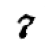

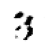

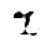

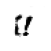

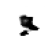

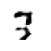

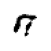

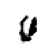

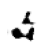

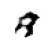

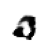

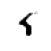

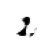

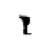

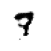

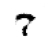

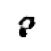

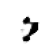

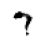

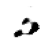

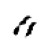

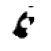

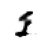

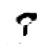

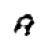

In [ ]:
# ### generate points in latent space as input for the generator

latent_points = generate_latent_points(100, 25) 
### generate images
X = g_model.predict(latent_points)
### create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
  ### plot images
  for i in range(n * n):
    ### define subplot
    pyplot.subplot(n, n, 1 + i)
    ### turn off axis
    pyplot.axis('off')
    ### plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()
 
save_plot(X, 5)

### 1.5 - Plot the generated samples ##

**Tasks:**
1. Train the GAN model for more epochs, i.e.,**10 epochs** and check the performance on the model. 
2. Plot the 5 * 5 = 25 outputs of the trained generator - 10 epochs. *

epoch: 1, iter: 1/234, discriminator loss: 0.683, generator loss: 0.755
epoch: 1, iter: 2/234, discriminator loss: 0.671, generator loss: 0.780
epoch: 1, iter: 3/234, discriminator loss: 0.665, generator loss: 0.795
epoch: 1, iter: 4/234, discriminator loss: 0.657, generator loss: 0.813
...
epoch: 10, iter: 232/234, discriminator loss: 0.677, generator loss: 0.731
epoch: 10, iter: 233/234, discriminator loss: 0.684, generator loss: 0.736
epoch: 10, iter: 234/234, discriminator loss: 0.674, generator loss: 0.734
Accuracy of real samples: 59%, Accuracy of fake samples: 77%


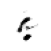

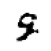

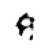

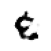

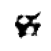

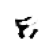

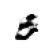

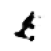

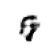

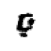

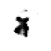

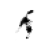

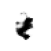

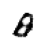

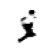

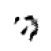

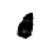

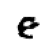

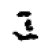

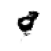

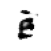

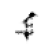

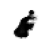

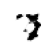

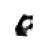

In [ ]:
### train with n_epochs=10, n_batch=256

keras.backend.clear_session() # Clear cached model
### create the discriminator ###
d_model = define_discriminator()
### create the generator ###
g_model = define_generator(latent_dim)
### create the gan ###
gan_model = define_gan(g_model, d_model)
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=10, n_batch=256)
summarize_performance(g_model, d_model, dataset, latent_dim)

### generate points in latent space as input for the generator
latent_points = generate_latent_points(100, 25) 
### generate images
X = g_model.predict(latent_points)
### create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
  ### plot images
  for i in range(n * n):
    ### define subplot
    pyplot.subplot(n, n, 1 + i)
    ### turn off axis
    pyplot.axis('off')
    ### plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()
 
save_plot(X, 5)
